In [ ]:
import dolfinx as dlx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from eikonax import tensorfield
from mpi4py import MPI

from cardiac_electrophysiology import fiberfield

sns.set_theme(style="ticks")

In [ ]:
def compute_forward_transform(parameter_vector):
    angle_vector = np.arccos(np.tanh(parameter_vector))
    return angle_vector


def compute_inverse_transform(angle_vector):
    tolerance = 1e-6
    angle_vector = np.clip(angle_vector, tolerance, 2 * np.pi - tolerance)
    parameter_vector = np.arctanh(np.cos(angle_vector))
    return parameter_vector

In [ ]:
mean_parameter_values = np.linspace(-10, 10, 1000)
mean_angle_values = np.linspace(0, np.pi, 1000)
transformed_parameter_values = compute_forward_transform(mean_parameter_values)
transformed_angle_values = compute_forward_transform(mean_angle_values)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
axs[0].set_title("Forward Transformation")
axs[0].plot(mean_parameter_values, transformed_parameter_values)
axs[0].set_xlabel(r"$m$")
axs[0].set_ylabel(r"$\alpha$")
axs[1].set_title("Inverse Transformation")
axs[1].plot(transformed_parameter_values, mean_parameter_values)
axs[1].set_xlabel(r"$\alpha$")
axs[1].set_ylabel(r"$m$")

In [ ]:
angle_mean = np.pi / 4
angle_var = np.pi / 100

rng = np.random.default_rng(seed=42)
angle_samples = rng.normal(loc=angle_mean, scale=np.sqrt(angle_var), size=10000)

centered_angle_samples = angle_samples - angle_mean + np.pi / 2
centered_parameter_samples = compute_inverse_transform(centered_angle_samples)
parameter_mean = compute_inverse_transform(angle_mean)
parameter_samples = centered_parameter_samples + parameter_mean

parameter_variance = np.var(parameter_samples)
new_parameter_samples = rng.normal(
    loc=parameter_mean, scale=np.sqrt(parameter_variance), size=10000
)
new_centered_parameter_samples = new_parameter_samples - parameter_mean
reconstructed_angle_samples = compute_forward_transform(new_centered_parameter_samples)
angle_mean = compute_forward_transform(parameter_mean)
reconstructed_angle_samples = reconstructed_angle_samples + angle_mean - np.pi / 2

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
_ = axs[0].hist(angle_samples, bins=20, density=True)
axs[0].set_title("Original Angle Samples")
axs[0].set_xlabel(r"$\alpha$")
axs[0].set_ylabel("Density")

_ = axs[1].hist(reconstructed_angle_samples, bins=20, density=True)
axs[1].set_title("Reconstructed Angle Samples")
axs[1].set_xlabel(r"$\alpha$")
axs[1].set_ylabel("Density")

Text(0, 0.5, 'Density')

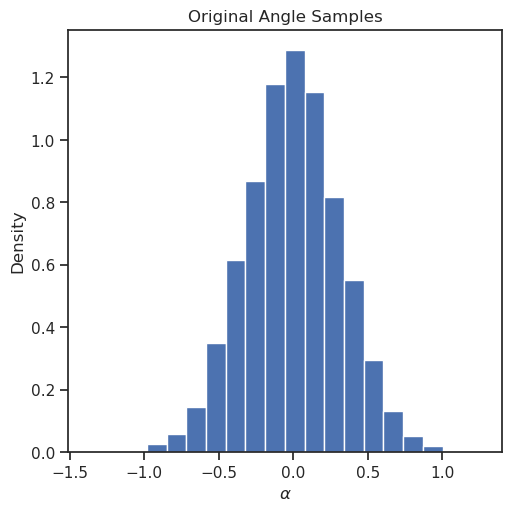

In [15]:
def transform_parameter_to_angle(parameter):
    angle = 1 /2 * np.atan2(np.sin(2 * parameter), np.cos(2 * parameter))
    return angle

rng = np.random.default_rng(seed=42)
parameter_samples = rng.normal(loc=0, scale=np.pi/10, size=10000)
angle_samples = transform_parameter_to_angle(parameter_samples)

fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
_ = ax.hist(angle_samples, bins=20, density=True)
ax.set_title("Original Angle Samples")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Density")